<a href="https://colab.research.google.com/github/MagnoSales/AluraStoreBR/blob/main/1AnaliseFaturamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importar bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

#Importar o DataFrame'

In [ ]:
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.25,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.23,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.26,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.67,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.96,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#Trabalhar o dataframe, para então iniciar a Análise.

In [ ]:
loja['idLoja'] = 'loja1' #criar um campo novo para identificar a loja
loja2['idLoja'] = 'loja2' #criar um campo novo para identificar a loja
loja3['idLoja'] = 'loja3' #criar um campo novo para identificar a loja
loja4['idLoja'] = 'loja4' #criar um campo novo para identificar a loja

In [ ]:
# Concatenar todos os DataFrames em um único DataFrame
df_combinado = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

# Salvar o DataFrame combinado em um novo arquivo CSV
df_combinado.to_csv('lojas_combinadas.csv', index=False)

df_combinado.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,idLoja
0,Assistente virtual,eletronicos,219.08,9.25,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,loja1
1,Mesa de jantar,moveis,256.35,11.23,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,loja1
2,Jogo de tabuleiro,brinquedos,279.51,21.26,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,loja1
3,Micro-ondas,eletrodomesticos,1009.99,54.67,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,loja1
4,Cadeira de escritório,moveis,446.99,26.96,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,loja1


In [ ]:
#Renomear colunas para normalizar nomes dos campos
df_combinado = df_combinado.rename(columns={'Categoria do Produto':'catProduto','Preço':'Faturado','Data da Compra':'dtCompra','Local da compra':'localCompra','Avaliação da compra':'avaliacao','Tipo de pagamento':'pagamento','Quantidade de parcelas':'parcelas'}).copy()
df_combinado.head()

,Produto,catProduto,Faturado,Frete,dtCompra,Vendedor,localCompra,avaliacao,pagamento,parcelas,lat,lon,idLoja
0,Assistente virtual,eletronicos,219.08,9.25,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,loja1
1,Mesa de jantar,moveis,256.35,11.23,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,loja1
2,Jogo de tabuleiro,brinquedos,279.51,21.26,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,loja1
3,Micro-ondas,eletrodomesticos,1009.99,54.67,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,loja1
4,Cadeira de escritório,moveis,446.99,26.96,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,loja1


In [ ]:
#trasnforma nros em float
pd.options.display.float_format = '{:.2f}'.format
df_combinado.head()

,Produto,catProduto,Faturado,Frete,dtCompra,Vendedor,localCompra,avaliacao,pagamento,parcelas,lat,lon,idLoja
0,Assistente virtual,eletronicos,219.08,9.25,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,loja1
1,Mesa de jantar,moveis,256.35,11.23,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,loja1
2,Jogo de tabuleiro,brinquedos,279.51,21.26,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,loja1
3,Micro-ondas,eletrodomesticos,1009.99,54.67,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,loja1
4,Cadeira de escritório,moveis,446.99,26.96,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,loja1


#1. Análise do faturamento

In [ ]:
# Converta dtCompra para datetime
df_combinado['dtCompra'] = pd.to_datetime(df_combinado['dtCompra'], format='%d/%m/%Y')

# Crie a coluna Mês/Ano como período do pandas
df_combinado['Mês/Ano'] = df_combinado['dtCompra'].dt.to_period('M')

# Exiba o dataframe
df_combinado.head()

,Produto,catProduto,Faturado,Frete,dtCompra,Vendedor,localCompra,avaliacao,pagamento,parcelas,lat,lon,idLoja,Mês/Ano
0,Assistente virtual,eletronicos,219.08,9.25,2021-01-16,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,loja1,2021-01
1,Mesa de jantar,moveis,256.35,11.23,2022-05-18,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,loja1,2022-05
2,Jogo de tabuleiro,brinquedos,279.51,21.26,2021-03-15,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,loja1,2021-03
3,Micro-ondas,eletrodomesticos,1009.99,54.67,2022-05-03,João Souza,RS,4,boleto,1,-30.17,-53.50,loja1,2022-05
4,Cadeira de escritório,moveis,446.99,26.96,2020-11-07,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,loja1,2020-11


In [ ]:
# Certificar-se de que a coluna Preço seja numérica (isto por que na célula seguinte tomei erro por causa disso)
df_combinado['Faturado'] = pd.to_numeric(df_combinado['Faturado'], errors='coerce')
df_combinado.head()

,Produto,catProduto,Faturado,Frete,dtCompra,Vendedor,localCompra,avaliacao,pagamento,parcelas,lat,lon,idLoja,Mês/Ano
0,Assistente virtual,eletronicos,219.08,9.25,2021-01-16,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,loja1,2021-01
1,Mesa de jantar,moveis,256.35,11.23,2022-05-18,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,loja1,2022-05
2,Jogo de tabuleiro,brinquedos,279.51,21.26,2021-03-15,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,loja1,2021-03
3,Micro-ondas,eletrodomesticos,1009.99,54.67,2022-05-03,João Souza,RS,4,boleto,1,-30.17,-53.50,loja1,2022-05
4,Cadeira de escritório,moveis,446.99,26.96,2020-11-07,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,loja1,2020-11


In [ ]:
#Calcula o valor total do faturamento de todas as lojas
df_combinado_total_vendas = df_combinado['Faturado'].sum()
print(f'Faturamento total das lojas : {df_combinado_total_vendas:.2f}')

Faturamento total das lojas : 5871490.79


In [ ]:
# Calcular o faturamento de cada loja
df_combinado_loja = df_combinado.groupby('idLoja')['Faturado'].sum().reset_index()

# Adicionar a coluna de percentual ao DataFrame
df_combinado_loja['Participação(%)'] = (df_combinado_loja['Faturado'] / df_combinado_total_vendas) * 100

df_combinado_loja = df_combinado_loja.rename(columns={'idLoja':'Loja'}) #renomear coluna idLoja

df_combinado_loja


# Exibir o DataFrame com formatação de moeda
display(df_combinado_loja.style.format({
    'Faturado': 'R$ {:,.2f}',
    'Participação(%)': '{:.2f}%'
}))


,Loja,Faturado,Participação(%)
0,loja1,"R$ 1,534,509.12",26.13%
1,loja2,"R$ 1,488,459.06",25.35%
2,loja3,"R$ 1,464,025.03",24.93%
3,loja4,"R$ 1,384,497.58",23.58%


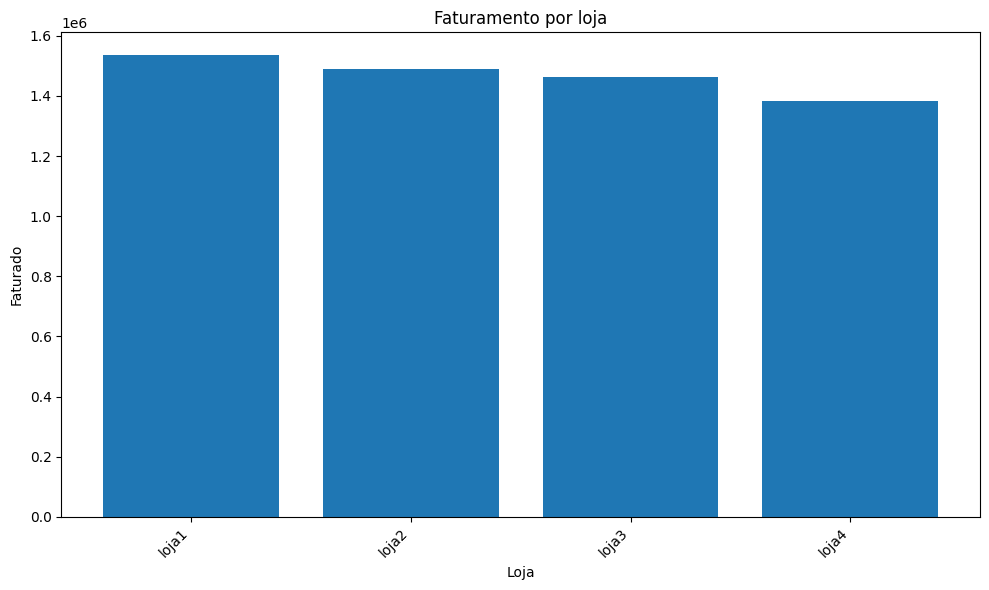

In [ ]:
# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_combinado_loja['Loja'], df_combinado_loja['Faturado'])
plt.xlabel('Loja')
plt.ylabel('Faturado')
plt.title('Faturamento por loja')
plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos do eixo x para melhor visualização
plt.tight_layout()
plt.show()

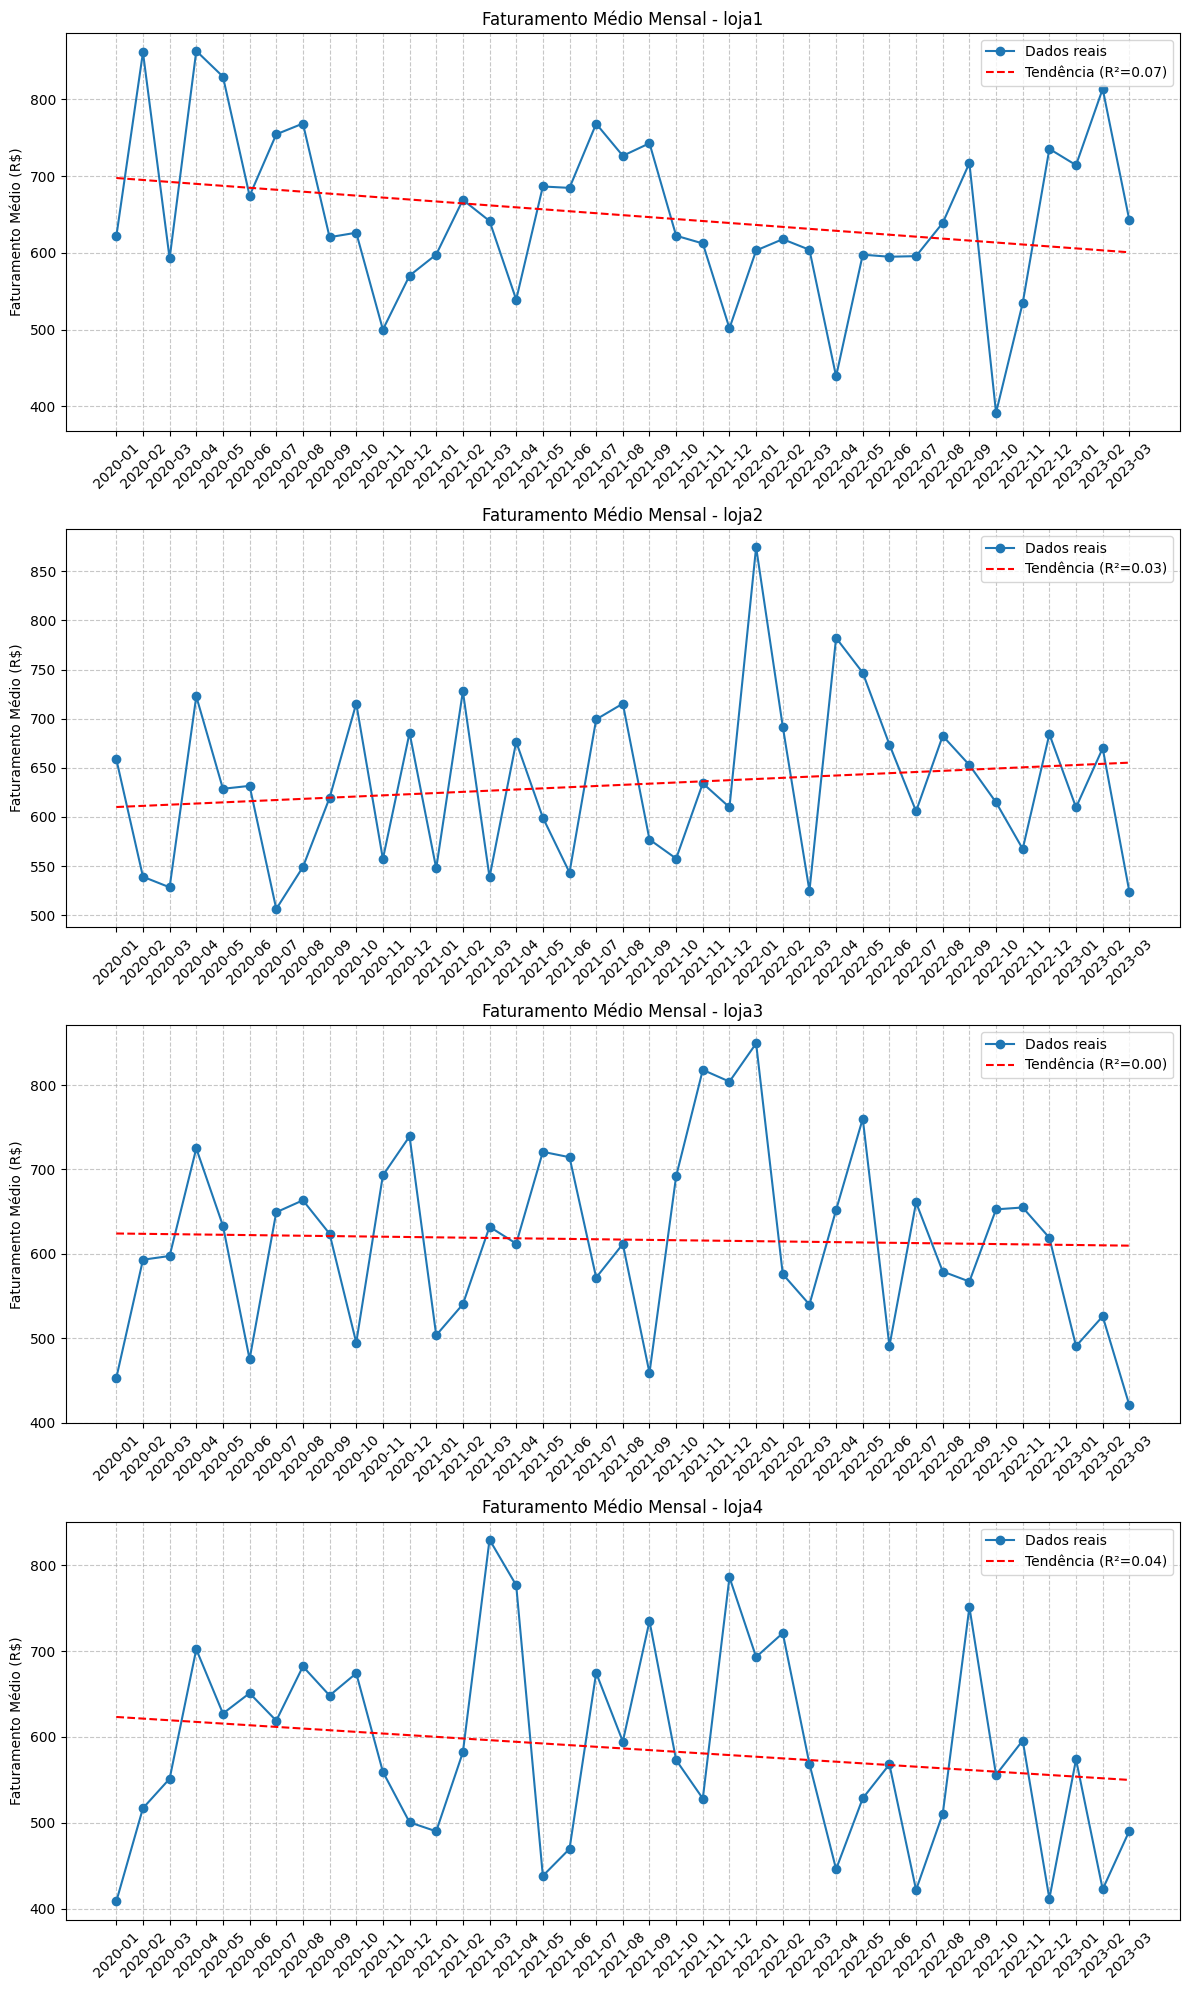

In [ ]:


# Criamos a coluna Mês/Ano para indexação temporal
df_combinado['Mês/Ano'] = df_combinado['dtCompra'].dt.to_period('M')

# Agrupamos por Mês/Ano e loja, calculando a média do faturamento
media_mensal_por_loja = df_combinado.groupby(['Mês/Ano', 'idLoja'])['Faturado'].mean().reset_index()

# Identificar as lojas únicas
lojas = df_combinado['idLoja'].unique()

# Criar um subplot para cada loja
fig, axes = plt.subplots(len(lojas), 1, figsize=(12, 5*len(lojas)), sharex=False)

for i, loja in enumerate(lojas):
    # Filtrar dados para a loja atual
    dados_loja = media_mensal_por_loja[media_mensal_por_loja['idLoja'] == loja]

    # Ordenar por Mês/Ano para garantir a sequência temporal correta
    dados_loja = dados_loja.sort_values('Mês/Ano')

    # Converter Mês/Ano para string para plotagem
    x_str = [str(period) for period in dados_loja['Mês/Ano']]
    y = dados_loja['Faturado'].values

    # Plotar os dados reais
    axes[i].plot(x_str, y, 'o-', label='Dados reais')

    # Adicionar linha de tendência
    x_num = np.arange(len(x_str))
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_num, y)
    linha_tendencia = intercept + slope * x_num
    axes[i].plot(x_str, linha_tendencia, 'r--', label=f'Tendência (R²={r_value**2:.2f})')

    # Configurar o gráfico
    axes[i].set_title(f'Faturamento Médio Mensal - {loja}')
    axes[i].set_ylabel('Faturamento Médio (R$)')
    axes[i].grid(True, linestyle='--', alpha=0.7)
    axes[i].legend()

    # Rotacionar os rótulos do eixo x para melhor legibilidade
    plt.setp(axes[i].xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.show()